<a href="https://colab.research.google.com/github/LeTranDinhTruc/w9_AI_BT/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


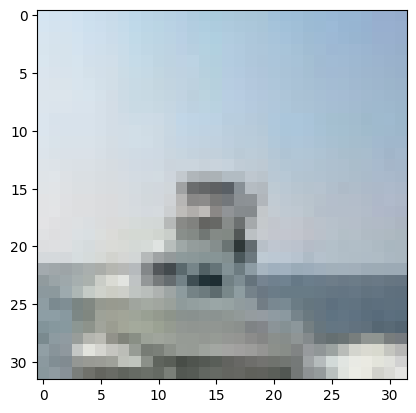

hinh: [8]


In [ ]:
import matplotlib.pyplot as plt
digit=x_train[100]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('hinh:',y_train[100])

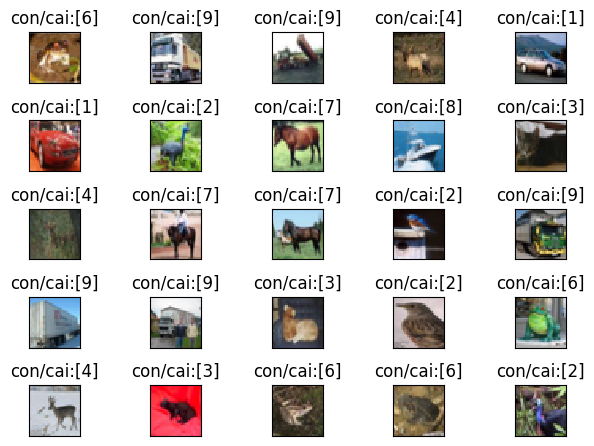

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('con/cai:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
#Dense: full connetion
#tao model mang ANN
model=Sequential()
#them lop mang trung gian
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
#them lop mang trung gian
model.add(Dense(1000,activation='relu'))
#them lop mang trung gian
model.add(Dense(500,activation='relu'))
#them lop dau ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_13 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dense_15 (Dense)            (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X=x_test
Y=y_test

In [ ]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mat mat:',test_loss)
print('do chinh xac:',test_acc)

Epoch 1/10
391/391 [==============================] - 4s 7ms/step - loss: 1.3591 - accuracy: 0.5152
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.3172 - accuracy: 0.5308
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.2887 - accuracy: 0.5396
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.2602 - accuracy: 0.5492
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.2311 - accuracy: 0.5620
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 1.2116 - accuracy: 0.5677
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1778 - accuracy: 0.5837
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1576 - accuracy: 0.5887
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 1.1312 - accuracy: 0.5994
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.6718 - accuracy: 0.470

In [ ]:
model.save('test1.h5')